#Desarrollo de Algoritmos de Aprendizaje Automático 
#AA02 - Trabajo Práctico II
#**Proyecto de clasificación empleando aprendizaje automático**


Link del codigo: https://colab.research.google.com/drive/17rf5EsuUTUvFq60g47bnVlMRO_weiAYZ?usp=sharing

In [50]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


##3.1 Preprocesamiento de datos:

In [51]:
#Cargo conjunto de datos
data = pd.read_csv("data_banknote_authentication.txt", header=None)

In [52]:
#Asigno nombres a las columnas
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

In [53]:
#Verifico si hay valores nulos
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

No hay valores nulos.

##3.2 Visualización de datos

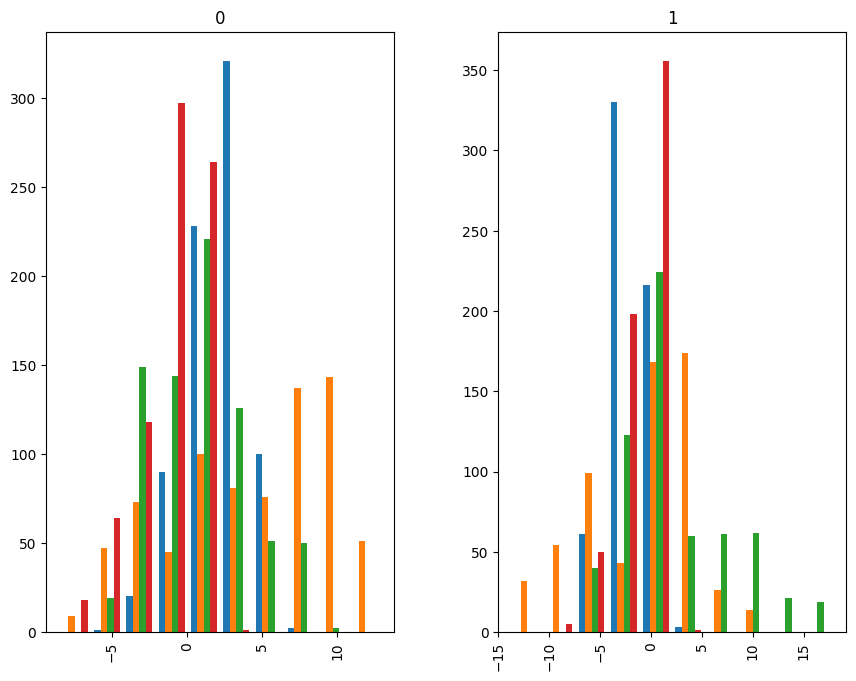

In [54]:
#Realizo un histograma de cada caracteristica segun la clase
data.hist(column=["variance", "skewness", "curtosis", "entropy"], by="class", figsize=(10, 8))
plt.show()

##3.3 Entrenamiento y evaluación del modelo

In [55]:
#Divido los datos en caracteristicas (X) y etiquetas (y)
X = data.drop("class", axis=1)
y = data["class"]

In [56]:
#Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##3.4 Emplear uno o varios algoritmos y determinar cuál se posee un mejor rendimiento

In [57]:
#Modelo: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
#Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

In [59]:
#Modelo: Support Vector Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [60]:
#Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

##3.5 Selección del modelo a emplear

In [61]:
#Comparo el rendimiento de los modelos mediante metricas de evaluacion
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSupport Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Random Forest Classifier:
Accuracy: 0.9927272727272727
Precision: 1.0
Recall: 0.984251968503937
F1-score: 0.9920634920634921
Confusion Matrix:
 [[148   0]
 [  2 125]]

Support Vector Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[148   0]
 [  0 127]]


##3.6 Ajuste y optimización del modelo

In [62]:
#Realizo una busqueda de cuadricula en el modelo Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

##3.7 Evaluación del modelo

In [63]:
print("\nBest Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1-score:", f1_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Best Random Forest Classifier:
Accuracy: 0.9927272727272727
Precision: 1.0
Recall: 0.984251968503937
F1-score: 0.9920634920634921
Confusion Matrix:
 [[148   0]
 [  2 125]]


##3.8 Mejoras y reflexiones

En conclusion, el modelo entrenado muestra un rendimiento satisfactorio en la clasificación de billetes en verdaderos o falsos, especialmente utilizando el Random Forest Classifier

Posibles mejoras o expansiones al modelo actual:
1. Probar otros algoritmos de clasificación, como Gradient Boosting o Redes Neuronales.

2. Realizar una búsqueda más exhaustiva de hiperparámetros: En lugar de probar solo algunos conjuntos de hiperparámetros como se hizo anteriormente, se puede utilizar técnicas avanzadas como RandomizedSearchCV o Bayesian Optimization. 

3. Considerar técnicas de regularización para evitar el sobreajuste del modelo, como la penalización L1 o L2.

5. Utilizar técnicas de ensamblaje, como votación o apilamiento, para combinar varios modelos y mejorar el rendimiento general.